In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Titulo : Influencia del consumo horas de pantalla (RRSS, TELE ....) en la salud mental

![Texto Salud Mental]("../img_Salud-mental.PNG")


## Hipótesis a contrastar sobre salud mental y tecnología

1. **Influencia del tiempo frente a pantallas en la salud mental**  
   Se busca determinar si la cantidad de tiempo de exposición a dispositivos digitales tiene un efecto significativo en el bienestar psicológico.

2. **Origen genético de los problemas mentales**  
   Se analiza si la mayoría de los trastornos mentales tienen una base hereditaria en lugar de ser causados por factores externos.

3. **Impacto de hábitos en la salud mental**  
   Se estudia si la salud mental está más influenciada por otros hábitos y condiciones de vida que por el tiempo de uso de pantallas.

4. **Efecto de las redes sociales en adolescentes**  
   Se evalúa si el consumo de información en redes sociales afecta a la salud mental de los adolescentes de manera más intensa que en otros grupos de edad.

 ⭐ ⭐⭐⭐⭐⭐⭐⭐⭐



In [20]:
df = pd.read_csv("../Datasets/digital_diet_mental_health.csv")
df2 =pd.read_csv("../Datasets/dataset.csv")


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

In [22]:
df

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1996,58,Female,5.6,4.0,2.5,0.3,1.5,1.1,1.2,...,9,0.0,Urban,62,0,1,164.9,20,17,4.9
1996,user_1997,62,Female,3.9,3.1,1.0,1.5,1.1,2.7,4.1,...,8,2.7,Urban,29,0,0,172.6,15,15,25.5
1997,user_1998,64,Female,7.4,3.0,0.0,1.4,0.9,0.8,2.6,...,4,6.5,Urban,54,1,0,101.3,1,20,9.5
1998,user_1999,19,Male,4.2,4.4,2.3,0.9,1.4,1.7,1.2,...,8,2.6,Urban,28,0,0,123.7,1,11,13.4


In [23]:
media_screen = df.groupby("gender")["daily_screen_time_hours"].mean()
df["total_usage_hours"] = df[
    [
        "phone_usage_hours",
        "laptop_usage_hours",
        "tablet_usage_hours",
        "tv_usage_hours",
        "social_media_hours",
        "work_related_hours",
    ]
].sum(axis=1)

In [24]:
bins = [0, 18, 30, 50, 100]  # Límites de los rangos
labels = ['Menor', 'Joven', 'Adulto', 'Mayor']  # Etiquetas para los rangos
df['Rango_Edad'] = pd.cut(df['age'], bins=bins, labels=labels)

df["media_combinada"]= (df["daily_screen_time_hours"] + df["total_usage_hours"])


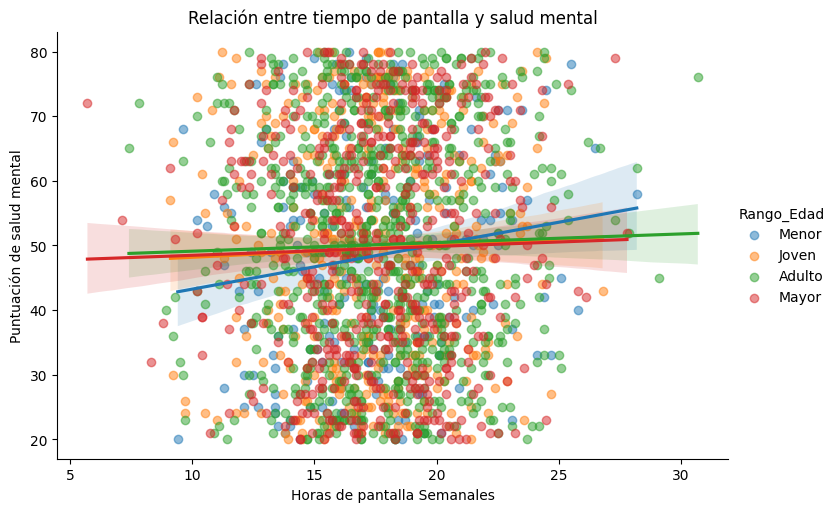

In [25]:
sns.lmplot(x='media_combinada', y='mental_health_score', data=df, aspect=1.5, scatter_kws={'alpha':0.5},hue ="Rango_Edad")
plt.xlabel('Horas de pantalla Semanales')
plt.ylabel('Puntuación de salud mental')
plt.title('Relación entre tiempo de pantalla y salud mental')
plt.show()

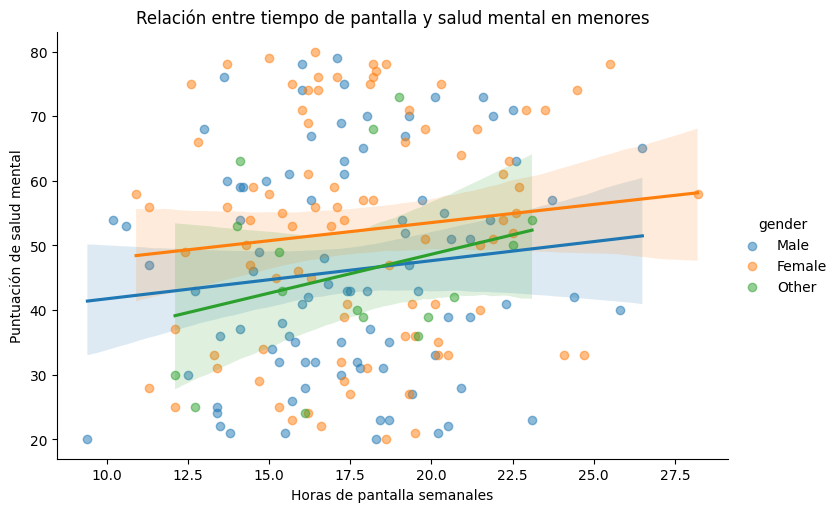

In [26]:
df_menores = df[df["age"] < 18]

# Crear el gráfico de regresión lineal dentro de cada género
sns.lmplot(x='media_combinada', y='mental_health_score', data=df_menores, aspect=1.5, scatter_kws={'alpha':0.5}, hue="gender")

# Etiquetas y título
plt.xlabel('Horas de pantalla semanales')
plt.ylabel('Puntuación de salud mental')
plt.title('Relación entre tiempo de pantalla y salud mental en menores')

# Mostrar gráfico
plt.show()

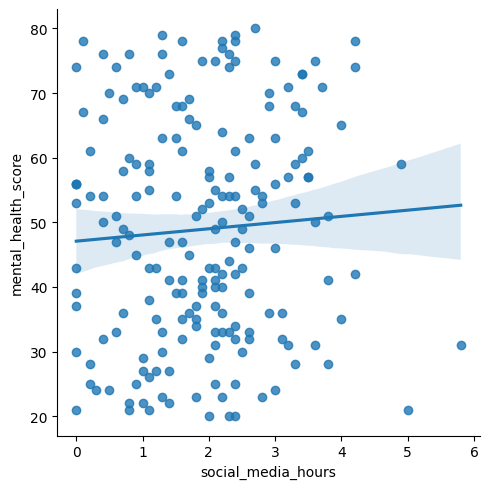

In [27]:
sns.lmplot(data = df_menores,x= "social_media_hours", y= "mental_health_score");

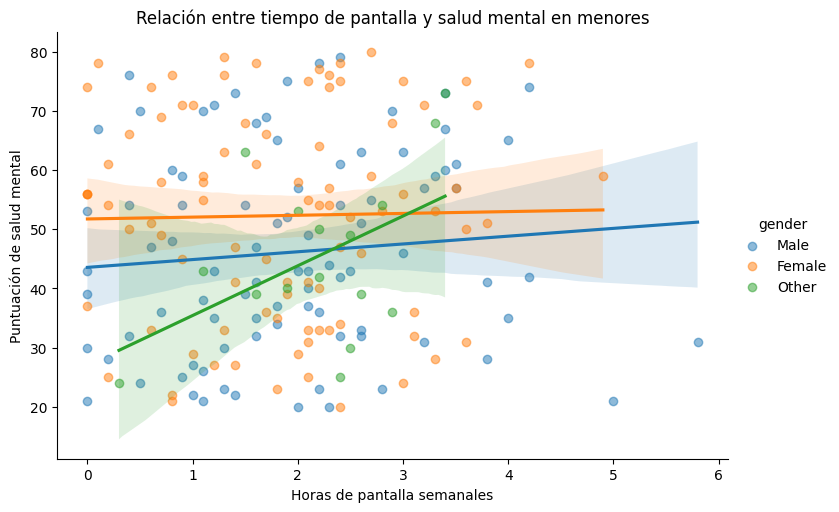

In [ ]:


# Crear el gráfico de regresión lineal dentro de cada género
sns.lmplot(data = df_menores,x= "social_media_hours", y= "mental_health_score", aspect=1.5, scatter_kws={'alpha':0.5}, hue="gender")

# Etiquetas y título
plt.xlabel('Horas de pantalla semanales')
plt.ylabel('Puntuación de salud mental')
plt.title('Relación entre tiempo de pantalla y salud mental en menores')

# Mostrar gráfico
plt.show()